# Third Demo

## Hopefully the working best last trend 

### Here is the main function analyzer 

### Here are the main functions 

In [1]:
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
def finding_last_big_change(ticker_series):
    #leumi_regression_data.reset_index(inplace=False)
    indexing = pd.RangeIndex(start=0,stop=len(ticker_series) ,step=1)
    ticker_series["numbers"] = indexing
    leumi_regression_data_reversed = ticker_series.iloc[-45::-1] # drops the last 30 dates for regression 
    count = 0
    for date in leumi_regression_data_reversed.index: #remove [:1] after tests 
        count+=1
        linear_regressor = LinearRegression()  # create object for the class
        current_date = "{}-{}-{}".format(date.year,date.month,date.day)
        current_regression = ticker_series.loc[current_date:] 
        linear_regressor.fit(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
        reg = LinearRegression().fit(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
        #r2_score_data = reg.score(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
        #r2_score_data = mean_squared_error(current_regression["numbers"].values.reshape(-1,1), current_regression["High"].values.reshape(-1,1))
        r2_score_data = mean_absolute_error(current_regression["numbers"].values.reshape(-1,1), current_regression["High"].values.reshape(-1,1))
        print(r2_score_data)
        if (r2_score_data < 600):
            temp = pd.Series(reg.predict(ticker_series["numbers"].values.reshape(-1,1)).reshape(-1))
            ticker_series["Dates"] = ticker_series.index
            data = ticker_series.set_index("numbers")
            data["pred y"]= temp
            data = data.set_index("Dates")
            data.plot()
            b = linear_regressor.intercept_
            a = linear_regressor.coef_ 
            print("number of iterations is:" ,count)
            return date , a.item(),b.item()
        #print(f"R-squared value: {r2_score}")
    print("number of iterations is:" ,count)
    return leumi_regression_data.index[0] , 0,0 # the first date 

In [2]:
def analyse_last_big_change_auto(ticker,field):
    #ticker_regression_data = ticker[field]
    ##print(ticker_regression_data)
    ##ticker_regression_data = smoothing_convolve(leumi_regression_data)
    #ticker_regression_data = ticker_regression_data.rolling(70).mean()
    #ticker_regression_data = ticker_regression_data.dropna() #drops the NaN elements 

    ticker_regression_data = smooth_plot(ticker,field)
    df = pd.DataFrame(ticker_regression_data)
    date , a , b = finding_last_big_change(df)
    return date , a , b 

In [3]:
def smooth_plot(ticker,field):
    ticker_regression_data = ticker[field]
    ticker_regression_data = ticker_regression_data.rolling(70).mean().rolling(70).mean()
    ticker_regression_data = ticker_regression_data.dropna() #drops the NaN elements 
    return ticker_regression_data

In [4]:
def change_alignment(ticker_series , a ,b):
    ticker_indexes = pd.Series(range(ticker_series.shape[0]))
    X = ticker_indexes.values.reshape(-1, 1)  # values converts it into a numpy array
    Y = ticker_series.values.reshape(-1, 1)
    Y_normalized = Y - (X * a + b)
    #plt.plot(X, Y_normalized, color="red")
    df = pd.DataFrame(Y_normalized , index=ticker_series.index)
    return df 

## Here are some examples

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  # To visualize
import yfinance as yf
leumi = yf.Ticker("LUMI.TA")
leumi_regression_data = leumi.history(start='2005-01-01',end='2023-09-20')

<Axes: xlabel='Date'>

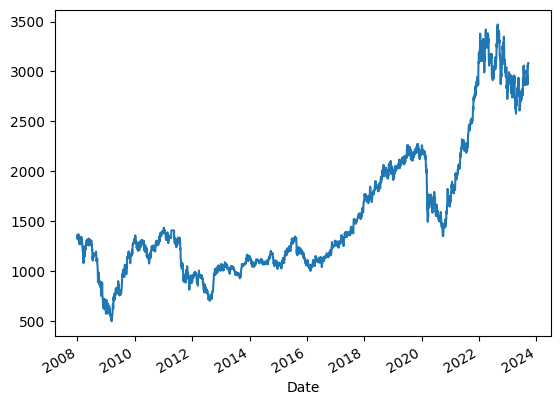

In [6]:
leumi_regression_data["High"].plot()

<Axes: xlabel='Date'>

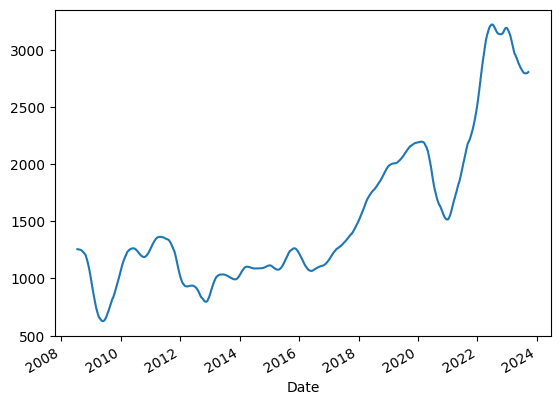

In [7]:
smooth_plot(leumi_regression_data,"High").plot()

924.1830127184936
923.4411740429994
922.6755164353085
921.8867772792019
921.0763604659804
920.2463187458306
919.3980236278521
918.533162659073
917.6520476088069
916.7548239064614
915.8417998374474
914.9130004264844
913.9684209388207
913.0084043651063
912.0332440143807
911.0436239110112
910.040348954022
909.0244220850981
907.9966878125222
906.957997849433
905.908597819375
904.8482974730473
903.7771087908365
902.6946932639521
901.6005041214822
900.4943635136534
899.3762051856415
898.245860400047
897.1033148030385
895.9486990980804
894.7818343487693
893.6029998933885
892.4124385646217
891.2101497561205
889.9961385280478
888.7700492725575
887.5314859478987
886.2802414173993
885.016261797461
883.7394705128889
882.449787716919
881.1471249745647
879.8313622420243
878.5023194341907
877.159831210694
875.8039127836508
874.4350021999109
873.0533710250597
871.6594819042643
870.2538893635269
868.8371849276089
867.409618459316
865.9718411897906
864.524655211214
863.0685269244586
861.6039459063604
86

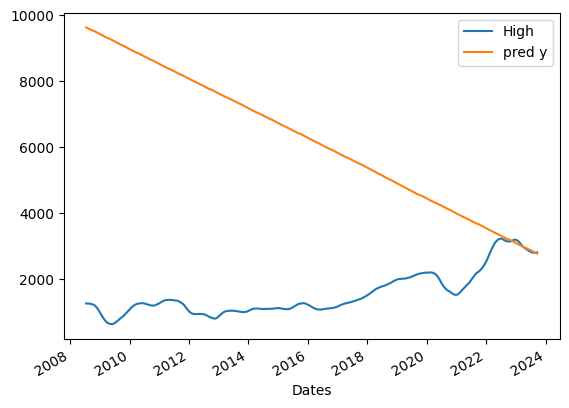

In [8]:
df = analyse_last_big_change_auto(leumi_regression_data,"High")

# Another try of finding numeric mininimum using 'Nelder-Mead'

In [9]:
from scipy.optimize import minimize, rosen, rosen_der

In [10]:
from scipy.optimize import minimize, rosen, rosen_der
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize(rosen, x0, method='Nelder-Mead', tol=1e-6)

In [11]:
res.x

array([1.00000002, 1.00000002, 1.00000007, 1.00000015, 1.00000028])

In [12]:
def square(x):
    return (x-4)**2

In [13]:
square(2)

4

In [14]:
res = minimize(square , [10] , method='Nelder-Mead', tol=1e-6)

In [15]:
res.x


array([4.])

# For Real Using the Nelder-Mead Solution for optimaztion 

In [16]:
from scipy.optimize import minimize, rosen, rosen_der

In [17]:
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
def finding_last_big_change_nelder_mead(ticker_series):
    err = pd.Series()
    indexing = pd.RangeIndex(start=0,stop=len(ticker_series) ,step=1)
    ticker_series["numbers"] = indexing
    leumi_regression_data_reversed = ticker_series.iloc[-45::-1] # drops the last 30 dates for regression 
    count = 0
    for date in leumi_regression_data_reversed.index: #remove [:1] after tests 
        count+=1
        linear_regressor = LinearRegression()  # create object for the class
        current_date = "{}-{}-{}".format(date.year,date.month,date.day)
        current_regression = ticker_series.loc[current_date:] 
        linear_regressor.fit(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
        reg = LinearRegression().fit(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
        #r2_score_data = reg.score(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
        #r2_score_data = mean_squared_error(current_regression["numbers"].values.reshape(-1,1), current_regression["High"].values.reshape(-1,1))
        r2_score_data = mean_absolute_error(current_regression["numbers"].values.reshape(-1,1), current_regression["High"].values.reshape(-1,1))
        temp = pd.Series([r2_score_data],index=[current_date])
        err = pd.concat([err, temp])
    return err

In [18]:
df_nelder = smooth_plot(leumi_regression_data,"High")
df_nelder = pd.DataFrame(df_nelder)
err = finding_last_big_change_nelder_mead(df_nelder)
print(err)
print(err.idxmin())

2023-7-17    924.183013
2023-7-16    923.441174
2023-7-13    922.675516
2023-7-12    921.886777
2023-7-11    921.076360
                ...    
2008-7-23    648.384043
2008-7-22    648.545501
2008-7-21    648.707196
2008-7-20    648.869126
2008-7-17    649.031296
Length: 3699, dtype: float64
2022-3-1


In [19]:
def regression_from_date(ticker_series , date, should_plot=False):
    indexing = pd.RangeIndex(start=0,stop=len(ticker_series) ,step=1)
    ticker_series["numbers"] = indexing
    current_date = "{}-{}-{}".format(date.year,date.month,date.day)
    #current_date = date 
    current_regression = ticker_series.loc[current_date:] 
    linear_regressor = LinearRegression()
    linear_regressor.fit(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
    b = linear_regressor.intercept_
    a = linear_regressor.coef_ 
    if(should_plot):
        indexing = pd.RangeIndex(start=0,stop=len(ticker_series) ,step=1)
        ticker_series["numbers"] = indexing
        temp = pd.Series(linear_regressor.predict(ticker_series["numbers"].values.reshape(-1,1)).reshape(-1))
        ticker_series["Dates"] = ticker_series.index
        data = ticker_series.set_index("numbers")
        data["pred y"]= temp
        data = data.set_index("Dates")
        #data["pred y"].plot()
        #data["High"].plot()
    return a.item() , b.item() , data 

In [20]:

a , b ,df = regression_from_date(leumi_regression_data, pd.to_datetime(err.idxmin()),True)

<Axes: xlabel='Date'>

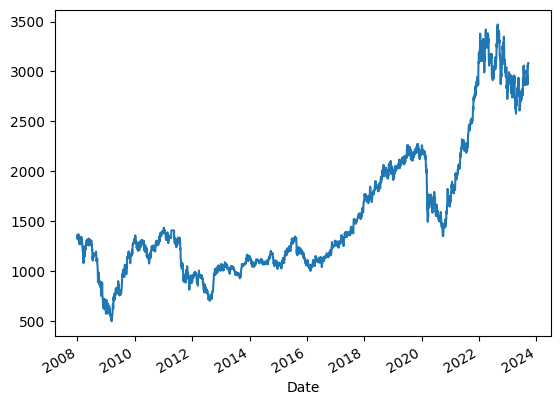

In [21]:
leumi_regression_data["High"].plot()

In [22]:
df1 = change_alignment(leumi_regression_data["High"] , a ,b)

<Axes: xlabel='Date'>

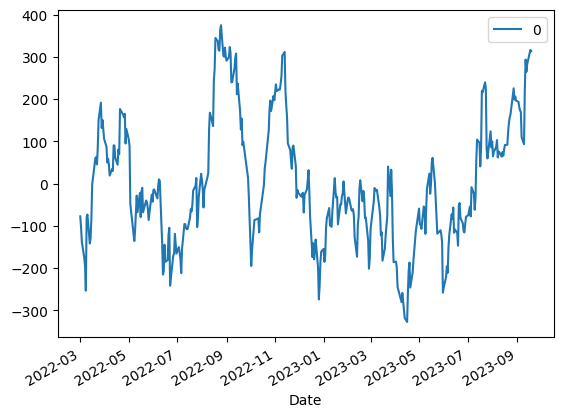

In [23]:
df1[err.idxmin():].plot()

In [24]:
pd.to_datetime(err.idxmin())

Timestamp('2022-03-01 00:00:00')

# Package It !

In [41]:
import matplotlib.pyplot as plt


def auto_calculation(ticker_series):
    df_nelder = smooth_plot(ticker_series,"High")
    df_nelder = pd.DataFrame(df_nelder)
    err = finding_last_big_change_nelder_mead(df_nelder)
    #fig, axes = plt.subplots(nrows=1, ncols=2)
    a , b , df = regression_from_date(ticker_series, pd.to_datetime(err.idxmin()),should_plot=True)
    
    df["pred y"].plot() # """ax=axes[0]"""
    df["High"].plot() # """ax=axes[0]"""

     # Plot results
    pd_err = pd.DataFrame(err , columns=["err"])
    pd_err['min'] = pd_err.err[(pd_err.err.shift(1) > pd_err.err) & (pd_err.err.shift(-1) > pd_err.err)]
    plt.scatter(pd_err.index, pd_err['min'], c='r')
    pd_err = pd_err.dropna() #drops the NaN elements 

    plt.show();
    
    df1 = change_alignment(ticker_series["High"] , a ,b)
    #df1[err.idxmin():].plot(ax=axes[1])

    
    print(pd.to_datetime(err.idxmin()))
    

    print(pd_err)

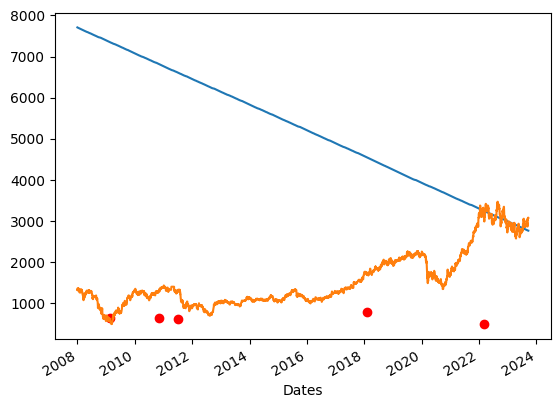

2022-03-01 00:00:00
                   err         min
2022-3-1    508.877145  508.877145
2018-1-31   788.971665  788.971665
2011-6-28   631.240055  631.240055
2010-10-31  632.989236  632.989236
2009-2-23   633.234264  633.234264


In [42]:
auto_calculation(leumi_regression_data)

# Generalize Solution 

In [43]:
import yfinance as yf

# Download 15 years of historical stocks using the daily time frame
leumi = yf.download("LUMI.TA", period="15y", interval="1d")
discount = yf.download("DSCT.TA", period="9y", interval="1d")
bezeq = yf.download("BEZQ.TA", period="9y", interval="1d")
cellcom = yf.download("CEL.TA", period="15y", interval="1d")
elbit = yf.download("ESLT.TA", period="9y", interval="1d")
nice = yf.download("NICE.TA", period="9y", interval="1d")
teva = yf.download("TEVA.TA", period="9y", interval="1d")
# POLI.TA
# MZTF.TA
# FIBI.TA
# HARL.TA
# MGDL.TA
# CLIS.TA
# PHOE.TA
# MMHD.TA
# DRS.TA
# BSEN.TA
# HLAN.TA
# FTAL.TA
# DANE.TA
# ONE.TA
# MTRX.TA
# ALHE.TA
# UWAY.TA
# TRAN.TA
POLI = yf.download("POLI.TA", period="9y", interval="1d")
MZTF = yf.download("MZTF.TA", period="9y", interval="1d")
FIBI = yf.download("FIBI.TA", period="9y", interval="1d")
HARL = yf.download("HARL.TA", period="9y", interval="1d")
MGDL = yf.download("MGDL.TA", period="9y", interval="1d")
CLIS = yf.download("CLIS.TA", period="9y", interval="1d")
PHOE = yf.download("PHOE.TA", period="9y", interval="1d")
MMHD = yf.download("MMHD.TA", period="9y", interval="1d")
DRS = yf.download("DRS.TA", period="9y", interval="1d")
BSEN = yf.download("BSEN.TA", period="9y", interval="1d")
HLAN = yf.download("HLAN.TA", period="9y", interval="1d")
FTAL = yf.download("FTAL.TA", period="9y", interval="1d")
DANE = yf.download("DANE.TA", period="9y", interval="1d")
ONE = yf.download("ONE.TA", period="9y", interval="1d")
MTRX = yf.download("MTRX.TA", period="9y", interval="1d")
ALHE = yf.download("ALHE.TA", period="9y", interval="1d")
UWAY = yf.download("UWAY.TA", period="9y", interval="1d")
TRAN = yf.download("TRAN.TA", period="9y", interval="1d")




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [39]:
ticker_vec = [POLI,MZTF,FIBI, HARL, MGDL, CLIS, PHOE, MMHD, DRS, BSEN, HLAN, FTAL, DANE, MTRX ,ALHE, UWAY, TRAN]

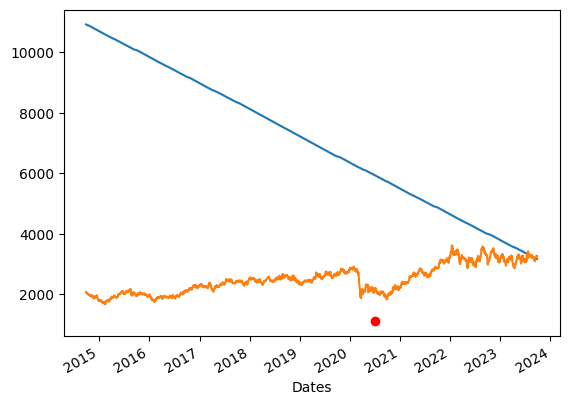

2023-07-20 00:00:00
                  err          min
2020-7-5  1106.087591  1106.087591


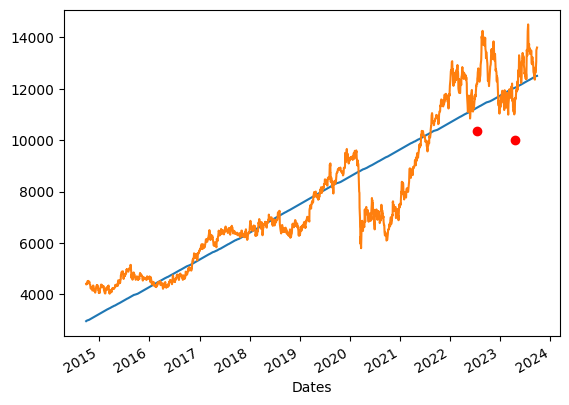

2015-04-19 00:00:00
                    err           min
2023-4-19  10003.178269  10003.178269
2022-7-17  10344.746334  10344.746334


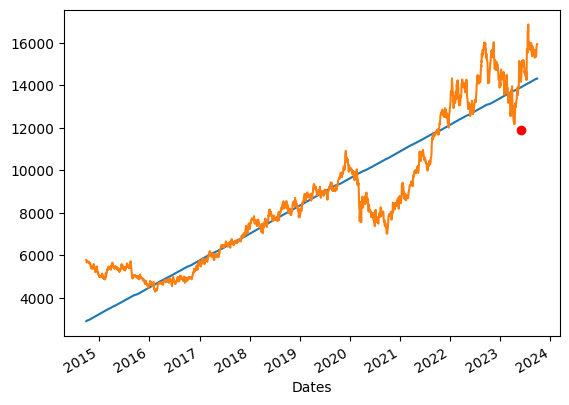

2015-04-19 00:00:00
                    err           min
2023-5-29  11905.744775  11905.744775


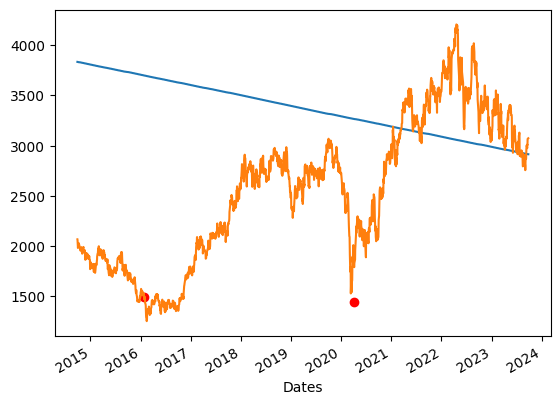

2023-07-20 00:00:00
                   err          min
2020-4-1   1443.745270  1443.745270
2016-1-27  1490.313773  1490.313773


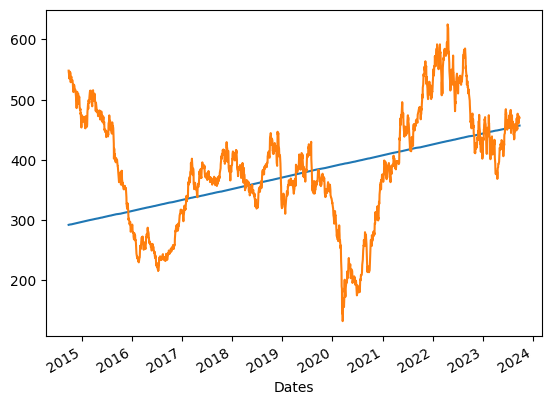

2015-04-19 00:00:00
Empty DataFrame
Columns: [err, min]
Index: []


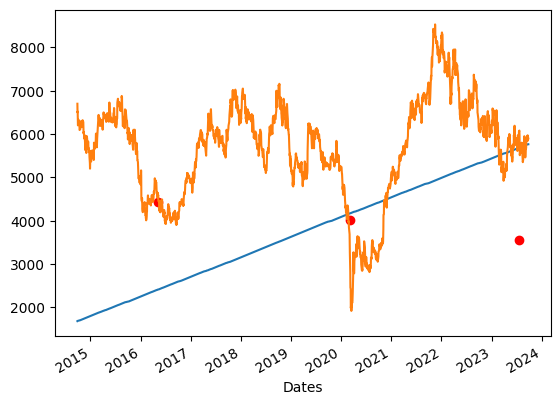

2023-07-18 00:00:00
                   err          min
2023-7-18  3563.162406  3563.162406
2020-3-5   4007.981747  4007.981747
2016-5-5   4426.504545  4426.504545


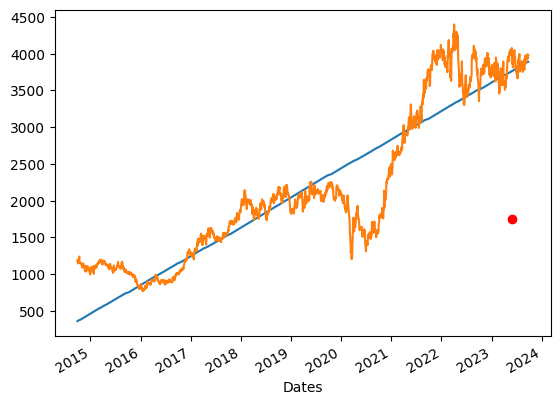

2015-04-19 00:00:00
                   err          min
2023-5-29  1745.268495  1745.268495


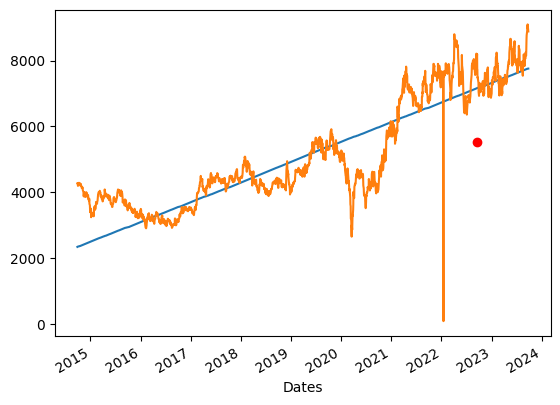

2015-04-19 00:00:00
                   err          min
2022-9-18  5519.755771  5519.755771


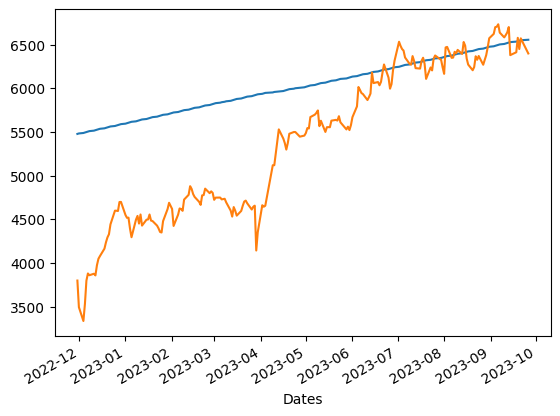

2023-06-22 00:00:00
Empty DataFrame
Columns: [err, min]
Index: []


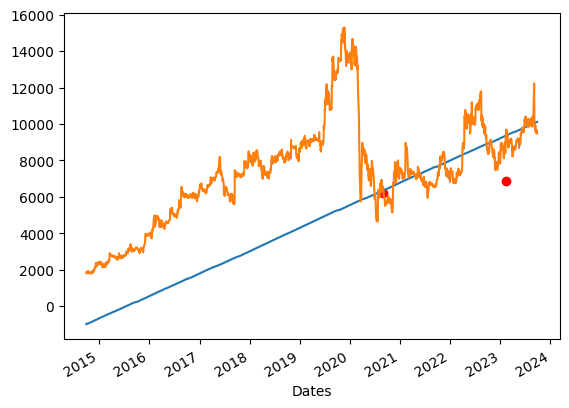

2020-08-26 00:00:00
                   err          min
2023-2-9   6847.014290  6847.014290
2020-8-26  6205.478576  6205.478576


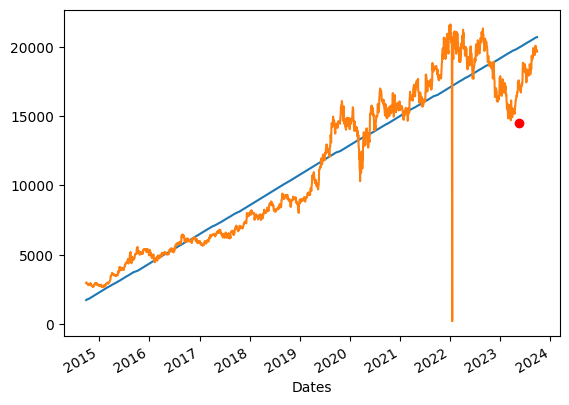

2015-04-19 00:00:00
                    err           min
2023-5-14  14510.762036  14510.762036


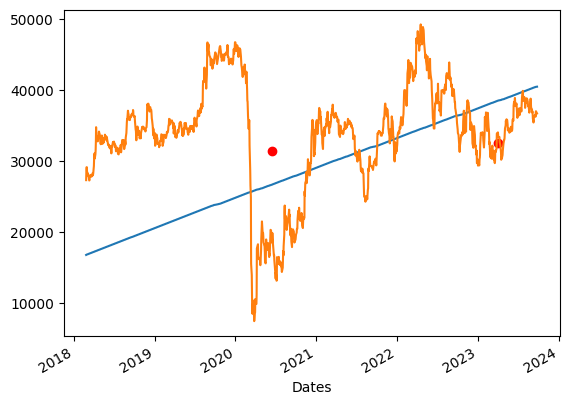

2020-06-14 00:00:00
                    err           min
2023-4-3   32519.428360  32519.428360
2020-6-14  31456.881394  31456.881394


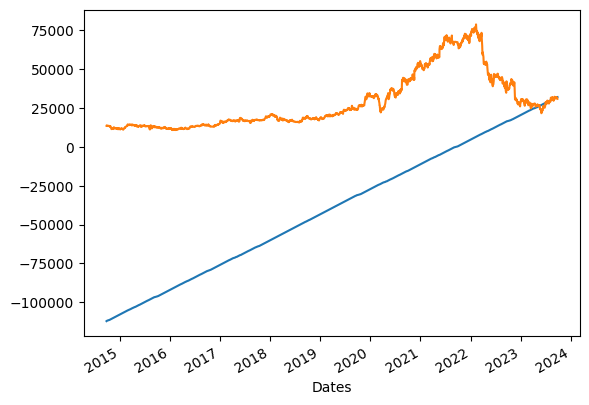

2023-07-20 00:00:00
Empty DataFrame
Columns: [err, min]
Index: []


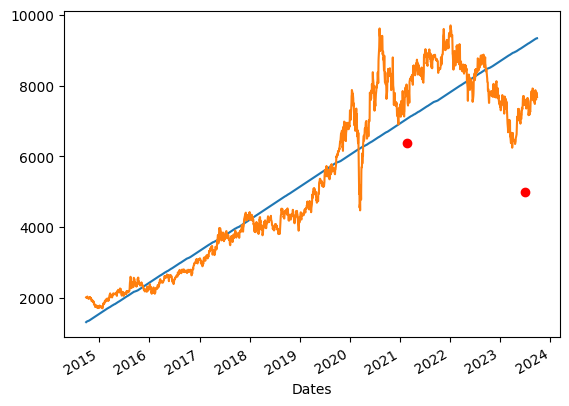

2015-04-19 00:00:00
                   err          min
2023-6-27  4993.424388  4993.424388
2021-2-22  6379.087288  6379.087288


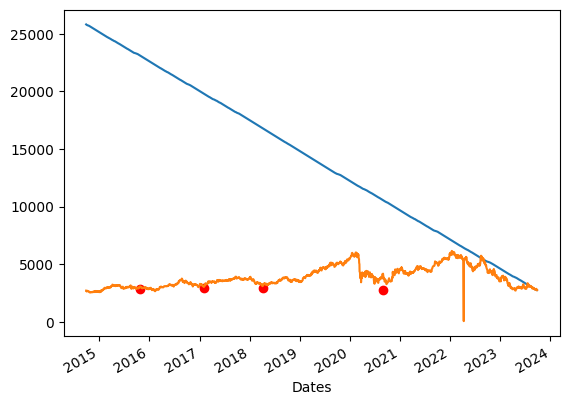

2023-07-20 00:00:00
                    err          min
2020-9-2    2717.776062  2717.776062
2018-4-8    2902.718687  2902.718687
2017-1-30   2904.339565  2904.339565
2015-10-29  2886.375624  2886.375624


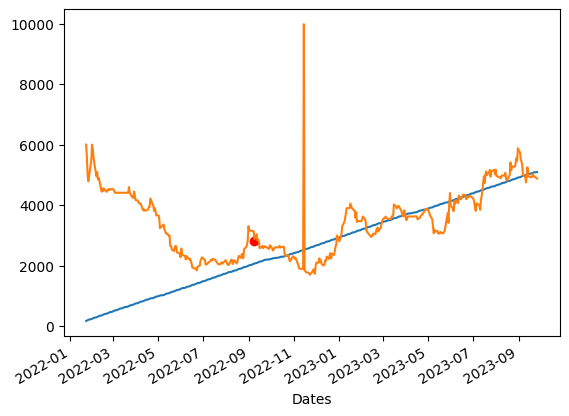

2022-09-07 00:00:00
                  err          min
2022-9-7  2813.793105  2813.793105


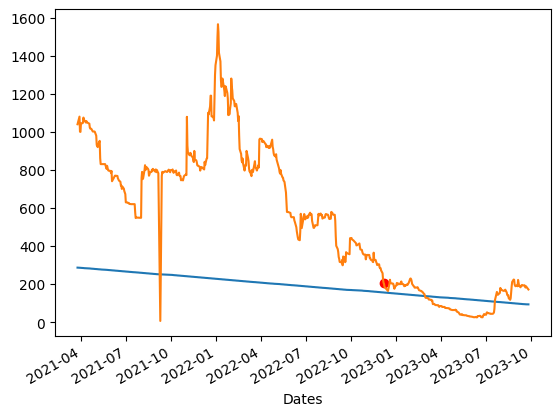

2022-12-07 00:00:00
                  err         min
2022-12-7  204.902243  204.902243


In [44]:
for ticker in ticker_vec:
    auto_calculation(ticker)

2022-01-24 00:00:00
                  err         min
2022-1-24  238.148478  238.148478
2017-8-20  351.279581  351.279581
2013-6-10  293.011890  293.011890
2012-8-19  288.711093  288.711093


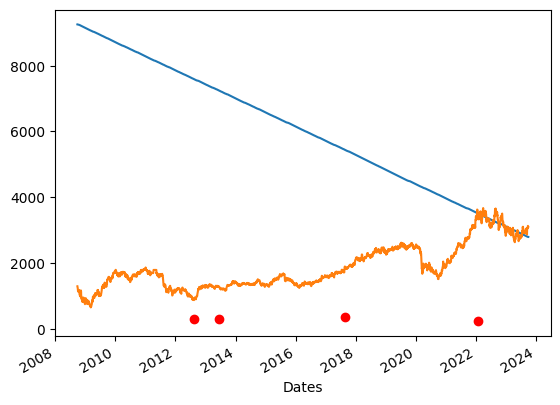

In [28]:
auto_calculation(leumi)

2022-01-24 00:00:00
                  err         min
2022-1-24  238.148478  238.148478
2017-8-20  351.279581  351.279581
2013-6-10  293.011890  293.011890
2012-8-19  288.711093  288.711093


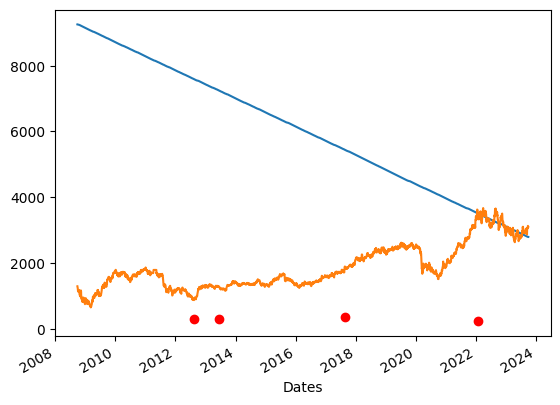

In [29]:
auto_calculation(leumi)

2022-08-25 00:00:00
                  err         min
2022-8-25  114.368860  114.368860
2021-7-8   140.647565  140.647565
2020-5-25  176.146032  176.146032
2018-7-24  218.883502  218.883502


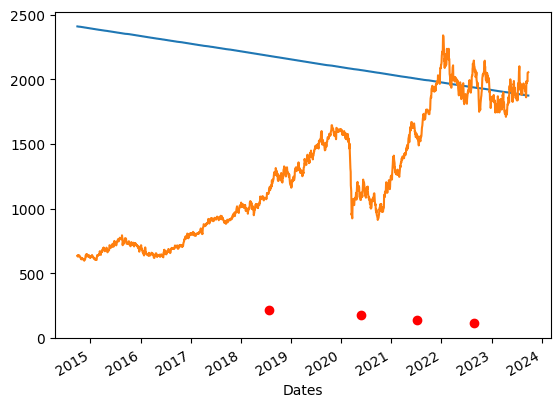

In [30]:
auto_calculation(discount)

2015-04-19 00:00:00
Empty DataFrame
Columns: [err, min]
Index: []


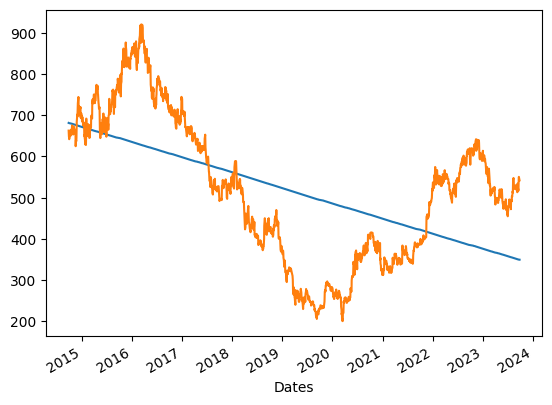

In [31]:
auto_calculation(bezeq)

2015-05-10 00:00:00
                   err          min
2022-3-20  1642.825647  1642.825647
2020-3-30  1638.494339  1638.494339
2017-11-5  1307.425628  1307.425628
2015-5-10  1226.945253  1226.945253


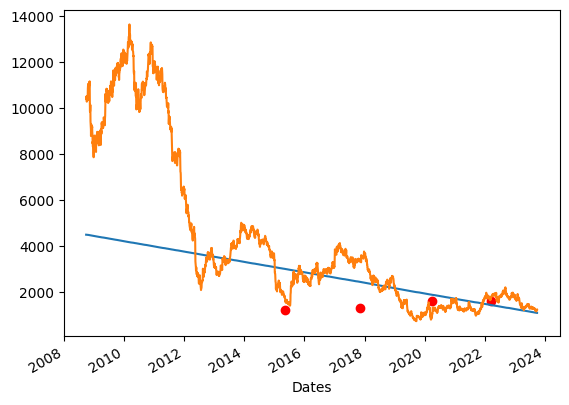

In [32]:
auto_calculation(cellcom)

2015-04-19 00:00:00
                    err           min
2023-2-27  63253.300962  63253.300962
2020-4-22  53455.117399  53455.117399


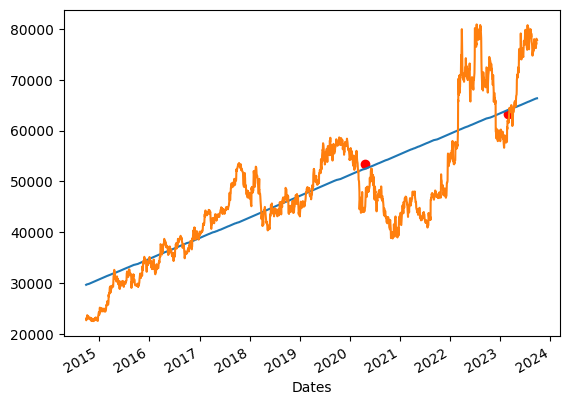

In [33]:
auto_calculation(elbit)

2015-04-19 00:00:00
                    err           min
2022-7-21  69882.235529  69882.235529


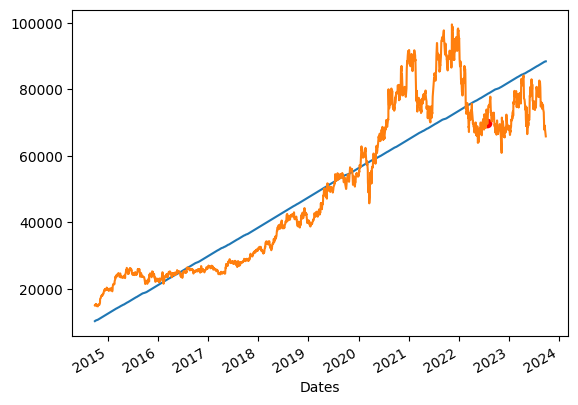

In [34]:
auto_calculation(nice)

2023-07-20 00:00:00
                  err          min
2022-3-7  1148.394028  1148.394028


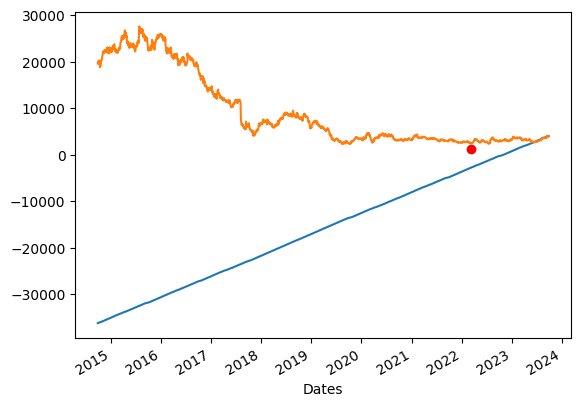

In [35]:
auto_calculation(teva)

<Axes: xlabel='Date'>

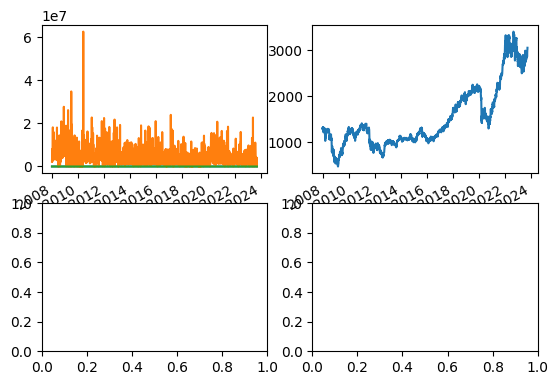

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
df1 = leumi_regression_data["High"]
df2 = leumi_regression_data["Low"]
df3 = leumi_regression_data["Volume"]
df4 = leumi_regression_data["Open"]

df1.plot(ax=axes[0,0])
df2.plot(ax=axes[0,1])
df3.plot(ax=axes[0,0])
df4.plot(ax=axes[0,0])


In [37]:
leumi

,Open,High,Low,Close,Adj Close,Volume,numbers,Dates
Date,,,,,,,,
2008-09-28,1275.0,1297.0,1221.0,1231.0,927.490051,6388907,0,2008-09-28
2008-10-02,1206.0,1242.0,1166.0,1166.0,878.516052,8261804,1,2008-10-02
2008-10-05,1158.0,1167.0,1057.0,1090.0,821.254272,9620189,2,2008-10-05
2008-10-06,1090.0,1146.0,1050.0,1050.0,791.116577,11823393,3,2008-10-06
2008-10-07,1071.0,1179.0,1054.0,1101.0,829.542175,13732299,4,2008-10-07
...,...,...,...,...,...,...,...,...
2023-09-18,3022.0,3085.0,3022.0,3063.0,3063.000000,2037686,3691,2023-09-18
2023-09-19,3079.0,3081.0,3052.0,3055.0,3055.000000,1969382,3692,2023-09-19
2023-09-20,3069.0,3075.0,3061.0,3071.0,3071.000000,1368570,3693,2023-09-20


In [ ]:
def parse(ticker):
    print()

In [ ]:
vec = [
# POLI.TA
# MZTF.TA
# FIBI.TA
# HARL.TA
# MGDL.TA
# CLIS.TA
# PHOE.TA
# MMHD.TA
# DRS.TA
# BSEN.TA
# HLAN.TA
# FTAL.TA
# DANE.TA
# ONE.TA
# MTRX.TA
# ALHE.TA
# UWAY.TA
# TRAN.TA]